### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [3]:
!pip install wordcloud

For language translation we need to install Google Translate API.

In [4]:
#installing the trranslate API
!pip install google_trans_new

In [5]:
import google_trans_new
print(google_trans_new.LANGUAGES) #available languages

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [6]:
from google_trans_new import google_translator
translator=google_translator()
translate_text=translator.translate("I live in India, My name is Ishita Maity",lang_tgt='bn',lang_src='en') #englist to bengali
translate_text2=translator.translate('I live in India, My name is Ishita Maity',lang_tgt='hi',lang_src='en') #english to hindi
translate_text3=translator.translate('I live in India, My name is Ishita Maity',lang_tgt='zh-cn',lang_src='en') #english to chinese
print(translate_text)
print(translate_text2)
print(translate_text)

আমি ভারতে থাকি, আমার নাম ইশিতা মাদক 
मैं भारत में रहता हूं, मेरा नाम ईशिता मैटी है 
আমি ভারতে থাকি, আমার নাম ইশিতা মাদক 


### Loading Datasets

In [7]:
df_cust=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_customers_dataset.csv')
df_loc=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_geolocation_dataset.csv')
df_items=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_order_items_dataset.csv')
df_pmt=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_order_payments_dataset.csv')
df_rvw=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_order_reviews_dataset.csv')
df_products=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_products_dataset.csv')
df_orders=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_orders_dataset.csv')
df_sellers=pd.read_csv(r'C:\Users\ishita\Downloads\olist\olist_sellers_dataset.csv')
df_cat_name=pd.read_csv(r'C:\Users\ishita\Downloads\olist\product_category_name_translation.csv')

##### review table

In [8]:
df_rvw.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
df_rvw.shape

(100000, 7)

In [10]:
df_rvw.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

review dataset has missing values in review_comment_title and review_comment_message

To deal with these missing values, we would seperate the reviews and the titles and drop the missing rows seperately so that we don't have unequal shapes of rows

In [11]:
review_title=df_rvw['review_comment_title']

review_data=df_rvw.drop(['review_comment_title'], axis=1)

In [12]:
#removing nan values
review_title=review_title.dropna()
review_data=review_data.dropna()

In [13]:
review_data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [14]:
review_title

9                        recomendo
15                 Super recomendo
19         Não chegou meu produto 
22                           Ótimo
34                      Muito bom.
                   ...            
99967                            👍
99971           muito bom produto 
99972    Não foi entregue o pedido
99974              OTIMA EMBALAGEM
99975               Foto enganosa 
Name: review_comment_title, Length: 11715, dtype: object

In [15]:
print(review_data.shape)
print(review_title.shape)

(41753, 6)
(11715,)


In [16]:
review_data= review_data.reset_index(drop=True)

##### Now I would transform the reviews data by removing stopwords, using regular expressions module to accept only letters, tokenize those words and then make all the words lower case for consistency

In [17]:
#Transforming the reviews data by removing stopwords, using regular expression
comments=[]
stop_words=set(stopwords.words('portuguese'))

for words in review_data['review_comment_message']:
    only_letters=re.sub("[^a-zA-Z]"," ", words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case=[word.lower() for word in tokens] #convert all letters to lower case
    filtered_result= list(filter(lambda word: word not in stop_words,lower_case)) #remove stopwords from the comments
    comments.append(' '.join(filtered_result))

In [18]:
comments

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

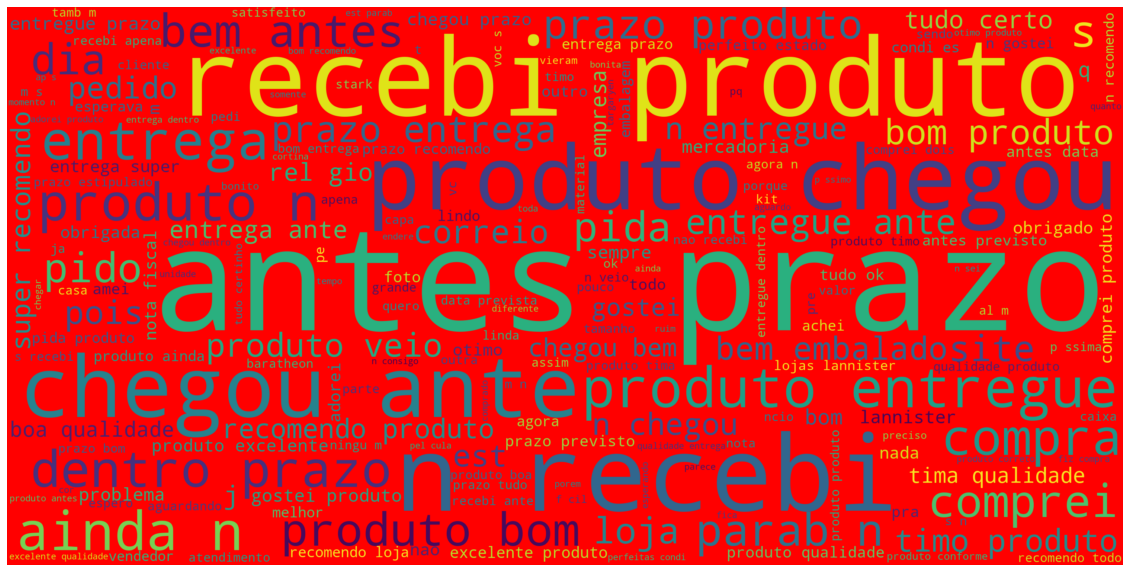

In [19]:
#using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud= WordCloud(width= 3000, height=1500, background_color='red').generate(unique_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

These words are in Portuguese. we need to translate these words to English.

In [20]:
#using CountVectorizer to get the most important trigrams
from sklearn.feature_extraction.text import CountVectorizer
co= CountVectorizer(ngram_range=(3,3))
counts= co.fit_transform(comments)
important_trigrams= pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values(0, ascending=False).head(50)
#we reset the index, rename the columns and apply the translate module to get the english translations
important_trigrams= important_trigrams.reset_index()
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'}, inplace=True)

important_trigrams['english_translation']= important_trigrams['trigrams'].apply(translator.translate)
important_trigrams

,trigrams,frequency,english_translation
0,chegou antes prazo,1112,arrived before deadline
1,bem antes prazo,708,well-term
2,entregue antes prazo,608,delivered before time
3,produto chegou antes,448,product has come before
4,entrega antes prazo,433,Delivery before time
5,chegou bem antes,417,arrived well before
6,produto entregue antes,374,product delivered before
7,entrega super pida,297,Super delivery
8,antes prazo previsto,287,before expected
9,ainda recebi produto,261,I still got a product


In [21]:
comments_eng=[]
for words in important_trigrams['english_translation']:
    only_letters=re.sub("[^a-zA-Z]"," ", words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case=[word.lower() for word in tokens] #convert all letters to lower case
    comments_eng.append(' '.join(lower_case))

In [22]:
comments_eng

['arrived before deadline',
 'well term',
 'delivered before time',
 'product has come before',
 'delivery before time',
 'arrived well before',
 'product delivered before',
 'super delivery',
 'before expected',
 'i still got a product',
 'product tima quality',
 'product good quality',
 'delivered in term',
 'delivery product',
 'before deadline',
 'before scheduled date',
 'i received before deadline',
 'perfect condi',
 'before deadline i recommend',
 'is parab ns',
 'came in a deadline',
 'before stipulated deadline',
 'delivery asks for product',
 'product arrived deadline',
 'delivery in term',
 'product arrived well',
 'i did not recieve the product',
 'i received a product before',
 'product delivered in',
 'delivered well before',
 'arrived before predicted',
 'product before',
 'product excellent quality',
 'at now i received',
 'well packaged product',
 'well packed',
 'at the moment i received',
 'before time all',
 'until deadline',
 'cost benefit',
 'before deadline deli

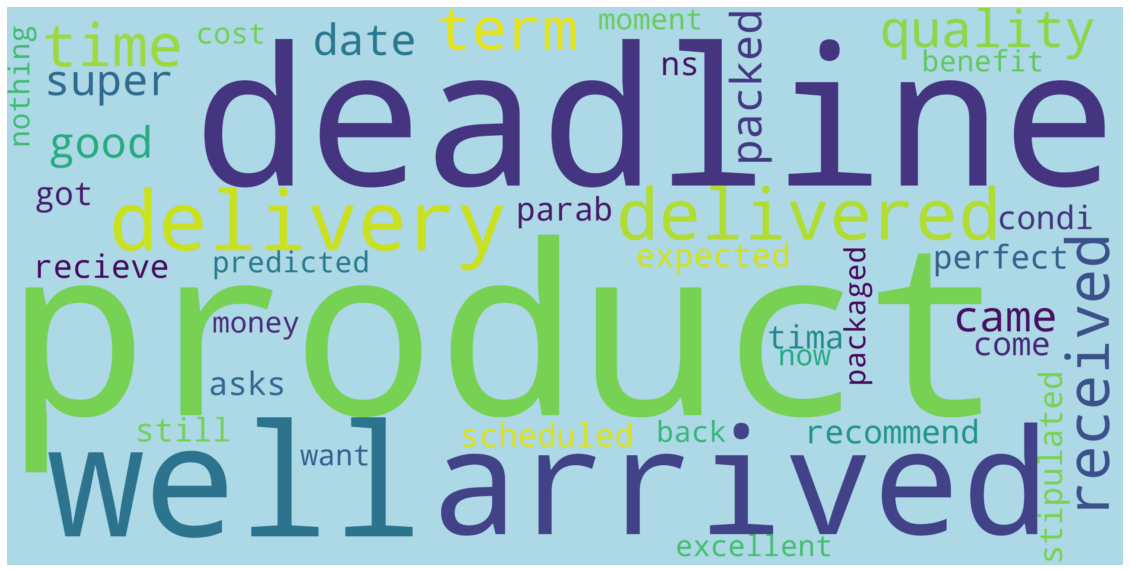

In [23]:
unique_string=(" ").join(comments_eng)
wordcloud= WordCloud(width= 3000, height=1500, background_color='lightblue').generate(unique_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#using countvecrtorizer to get the most important unigrams
co=CountVectorizer(ngram_range=(1,1))
counts= co.fit_transform(comments)
important_unigrams= pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values(0, ascending=False).head(50)
#we reset the index, rename the columns and apply the translate module to get the english translations
important_unigrams= important_unigrams.reset_index()
important_unigrams.rename(columns={'index':'unigrams',0:'frequency'}, inplace=True)

important_unigrams['english_translation']= important_unigrams['unigrams'].apply(translator.translate)
important_unigrams

,unigrams,frequency,english_translation
0,produto,18866,product
1,prazo,8543,deadline
2,entrega,6683,delivery
3,antes,5655,before
4,chegou,5643,it arrived
5,recebi,5464,I received
6,bom,4637,Good
7,recomendo,4362,I recommend
8,entregue,3899,delivered
9,veio,3362,he came


In [25]:
#using countvecrtorizer to get the most important bigrams
co=CountVectorizer(ngram_range=(2,2))
counts= co.fit_transform(comments)
important_bigrams= pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values(0, ascending=False).head(50)
#we reset the index, rename the columns and apply the translate module to get the english translations
important_bigrams= important_bigrams.reset_index()
important_bigrams.rename(columns={'index':'bigrams',0:'frequency'}, inplace=True)

important_bigrams['english_translation']= important_bigrams['bigrams'].apply(translator.translate)
important_bigrams

,bigrams,frequency,english_translation
0,antes prazo,4207,before term
1,recebi produto,1942,I received a product
2,produto chegou,1720,Product arrived
3,produto entregue,1616,product delivered
4,chegou antes,1465,arrived before
5,dentro prazo,1092,within term
6,bem antes,973,well before
7,parab ns,950,parab ns
8,entrega pida,900,delivery ask for
9,produto bom,883,good product


from the unigrams,bigrams and trigrams we can say that most of the customers were satisfied with the delivery service and also product quality

In [26]:
comment_titles=[]
stop_words=set(stopwords.words('portuguese'))

for words in review_title:
    only_letters=re.sub("[^a-zA-Z]"," ",words)
    tokens=nltk.word_tokenize(only_letters)
    lower_case=[l.lower() for l in tokens]
    filtered_result=list(filter(lambda l: l not in stop_words, lower_case))
    comment_titles.append(' '.join(filtered_result))

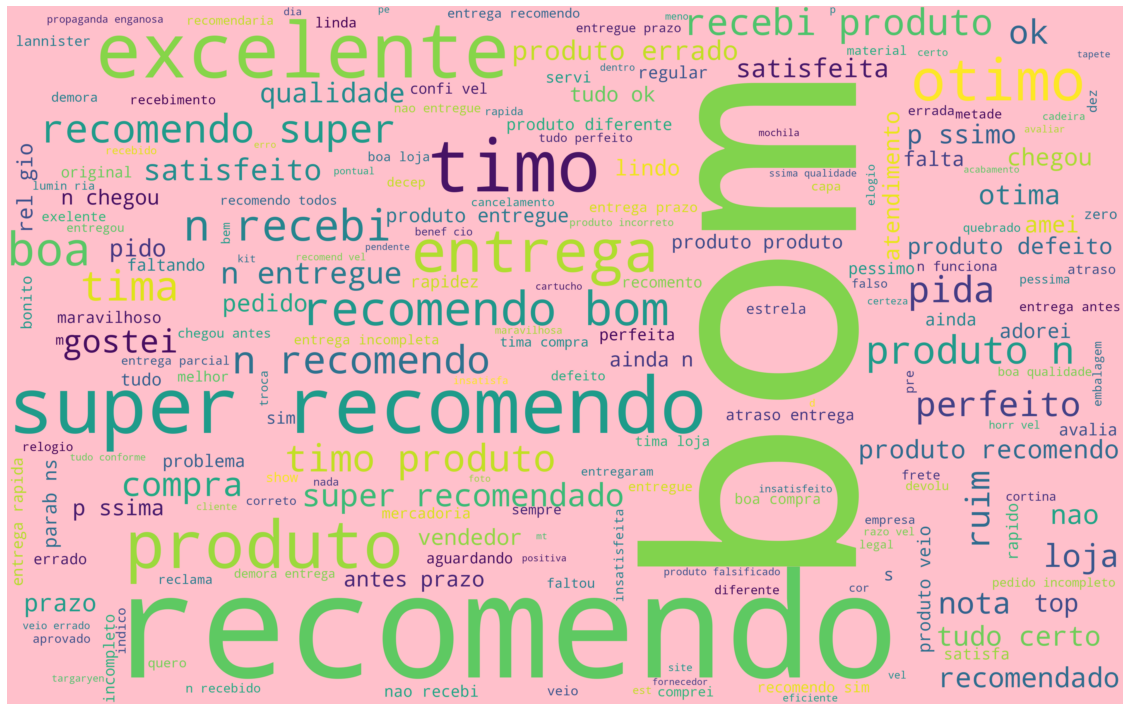

In [27]:
#visualize the comment_titles
unique_string=(" ").join(comment_titles)
wordcloud= WordCloud(width= 4000, height=2500, background_color='pink').generate(unique_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#using countvecrtorizer to get the most important unigrams
co=CountVectorizer(ngram_range=(1,1))
counts= co.fit_transform(comment_titles)
important_unigrams= pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values(0, ascending=False).head(50)
#we reset the index, rename the columns and apply the translate module to get the english translations
important_unigrams= important_unigrams.reset_index()
important_unigrams.rename(columns={'index':'unigrams',0:'frequency'}, inplace=True)

important_unigrams['english_translation']= important_unigrams['unigrams'].apply(translator.translate)
important_unigrams

,unigrams,frequency,english_translation
0,recomendo,2085,I recommend
1,produto,1327,product
2,bom,1321,Good
3,super,901,super
4,timo,730,Timo
5,excelente,665,Excellent
6,entrega,544,delivery
7,otimo,369,great
8,recebi,302,I received
9,boa,273,Good


In [29]:
#Transforming the reviews data by removing stopwords, using regular expression
comment_titles_eng=[]


for words in important_unigrams['english_translation']:
    only_letters=re.sub("[^a-zA-Z]"," ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case=[word.lower() for word in tokens] #convert all letters to lower case
    comment_titles_eng.append(' '.join(lower_case))

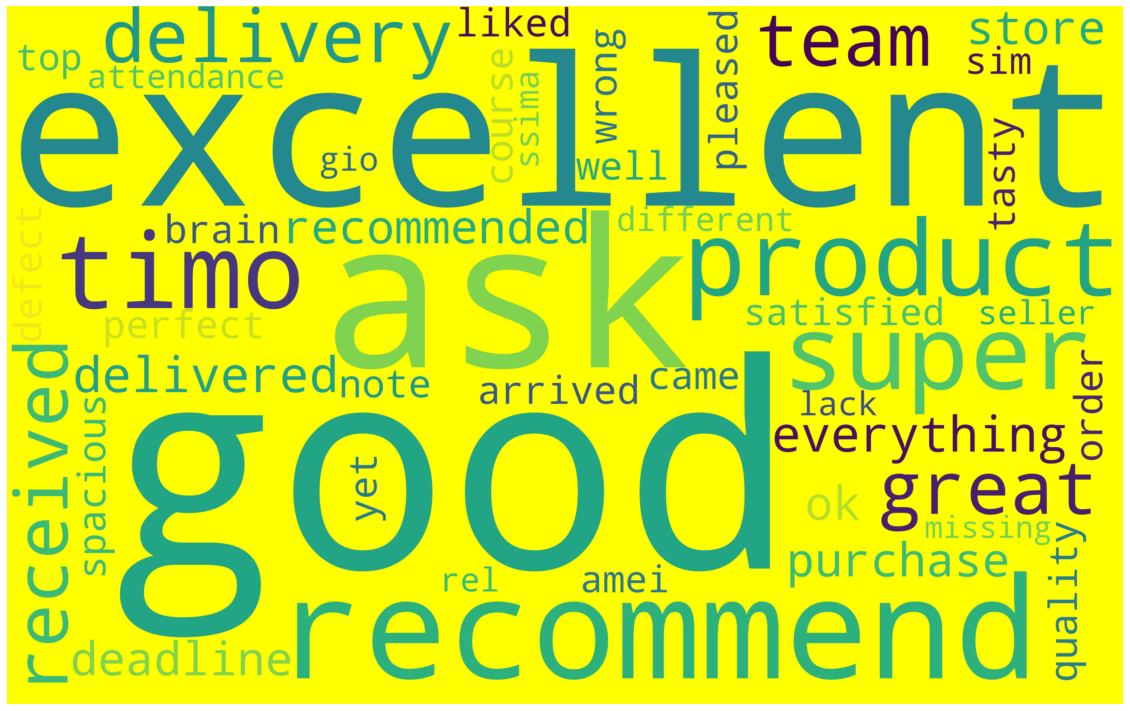

In [30]:
unique_string=(" ").join(comment_titles_eng)
wordcloud= WordCloud(width= 4000, height=2500, background_color='yellow').generate(unique_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From this above wordcloud we can see most frequent comments in english.

In [31]:
#using countvecrtorizer to get the most important bigrams
co=CountVectorizer(ngram_range=(2,2))
counts= co.fit_transform(comment_titles)
important_bigrams= pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values(0, ascending=False).head(50)
#we reset the index, rename the columns and apply the translate module to get the english translations
important_bigrams= important_bigrams.reset_index()
important_bigrams.rename(columns={'index':'bigrams',0:'frequency'}, inplace=True)

important_bigrams['english_translation']= important_bigrams['bigrams'].apply(translator.translate)
important_bigrams

,bigrams,frequency,english_translation
0,super recomendo,681,super recommend
1,recebi produto,131,I received a product
2,timo produto,103,Timo Product
3,super recomendado,103,super recommended
4,produto entregue,103,product delivered
5,entrega pida,92,delivery ask for
6,bom produto,76,good product
7,tudo certo,76,all very well
8,produto errado,74,wrong product
9,produto bom,66,good product


In [32]:
#using CountVectorizer to get the most important trigrams
from sklearn.feature_extraction.text import CountVectorizer
co= CountVectorizer(ngram_range=(3,3))
counts= co.fit_transform(comment_titles)
important_trigrams= pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names()).T.sort_values(0, ascending=False).head(50)
#we reset the index, rename the columns and apply the translate module to get the english translations
important_trigrams= important_trigrams.reset_index()
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'}, inplace=True)

important_trigrams['english_translation']= important_trigrams['trigrams'].apply(translator.translate)
important_trigrams

,trigrams,frequency,english_translation
0,entrega super pida,27,Super delivery
1,entrega antes prazo,15,Delivery before time
2,custo benef cio,12,cost benefit
3,chegou antes prazo,11,arrived before deadline
4,nao recebi produto,11,I did not recieve the product
5,produto boa qualidade,8,Product Good Quality
6,produto entregue prazo,8,delivery product
7,produto veio errado,7,Product came wrong
8,produto veio defeito,7,product
9,produto nao entregue,7,product not delivered


The unigrams, bigrams and trigrams of the review titles data have revealed the unhappy customers. These comments include: poorly packaged product,fale relay,I didn't receive prod, not delivered etc. We have also seen satisfaction among other customer.

In [33]:
comment_titles_eng2=[]


for words in important_trigrams['english_translation']:
    only_letters=re.sub("[^a-zA-Z]"," ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case=[word.lower() for word in tokens] #convert all letters to lower case
    comment_titles_eng2.append(' '.join(lower_case))

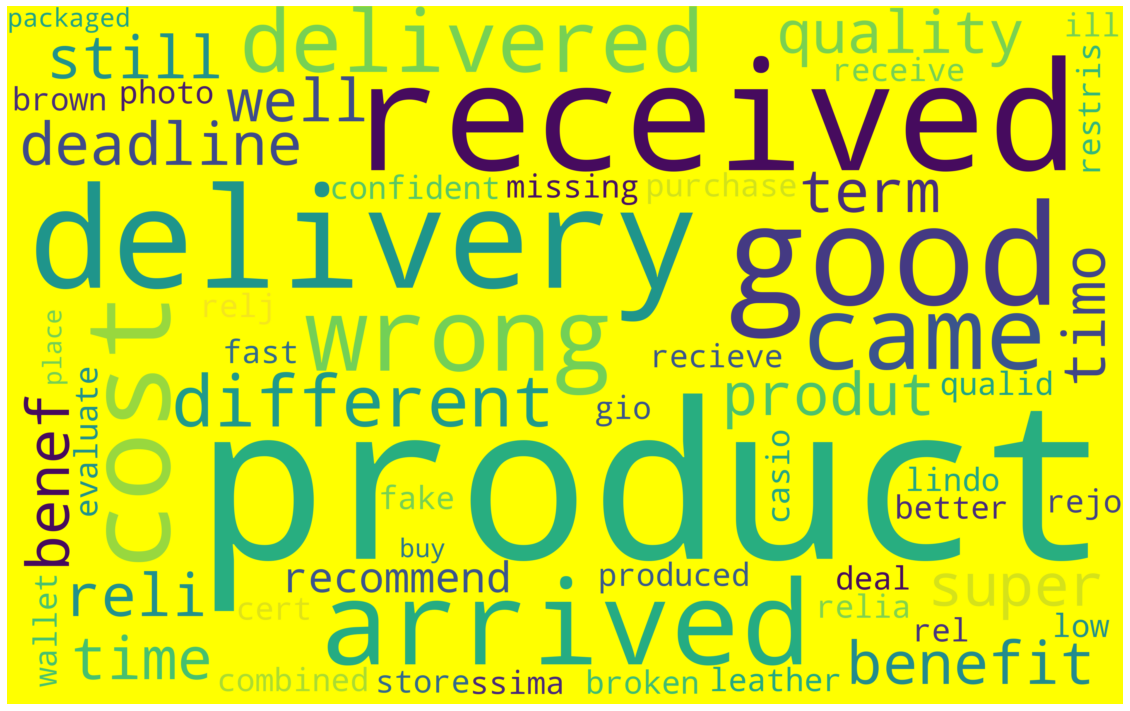

In [34]:
unique_string=(" ").join(comment_titles_eng2)
wordcloud= WordCloud(width= 4000, height=2500, background_color='yellow').generate(unique_string)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\ishita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ishita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score', ylabel='count'>

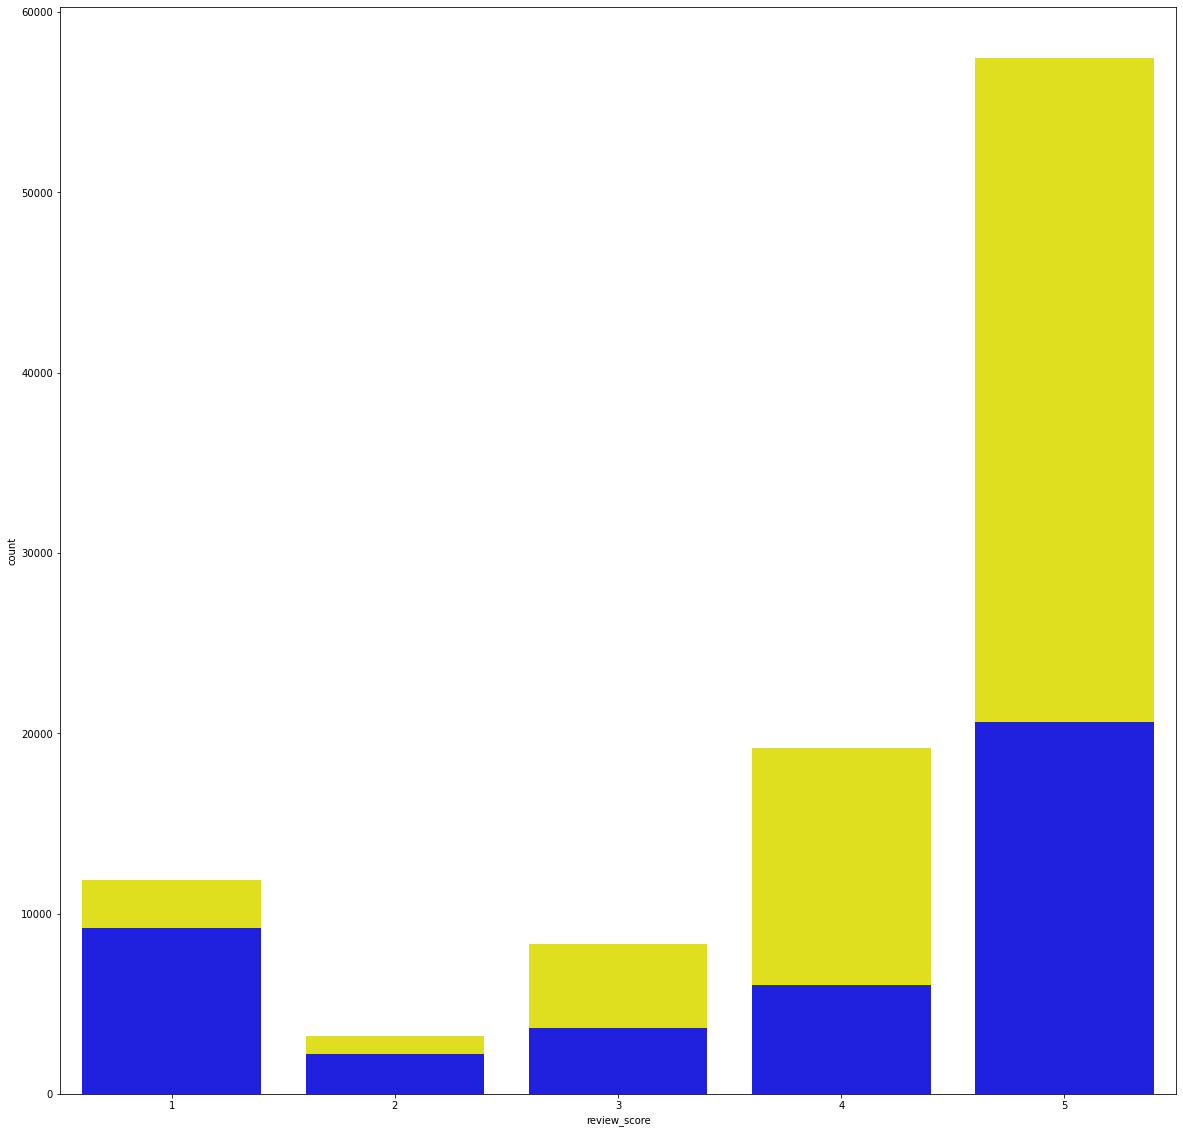

In [35]:
# plotting review score
plt.figure(figsize=(20,20))
sns.countplot(df_rvw['review_score'], color='yellow') #before removing nan values
sns.countplot(review_data['review_score'], color='blue') # after removing nan values

* close to 60,000 people gave 5 star ratings and little above 10,000 people gave 1 star ratings(before removing nan values)

* little above 20,000 people gave 5 star ratings and close to 10,000 people gave 1 star rating (after removing nan values)

In [36]:
review_data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...
41748,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
41749,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
41750,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
41751,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [37]:
review_data['review_creation_date']=pd.to_datetime(review_data['review_creation_date'])
review_data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
...,...,...,...,...,...,...
41748,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23
41749,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19,2018-05-20 21:51:06
41750,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
41751,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15,2017-12-16 01:29:43


In [38]:
review_data['review_creation_year']=review_data['review_creation_date'].dt.year
review_data['review_creation_year']

0        2017
1        2018
2        2018
3        2018
4        2018
         ... 
41748    2018
41749    2018
41750    2018
41751    2017
41752    2017
Name: review_creation_year, Length: 41753, dtype: int64

<AxesSubplot:xlabel='review_creation_year', ylabel='count'>

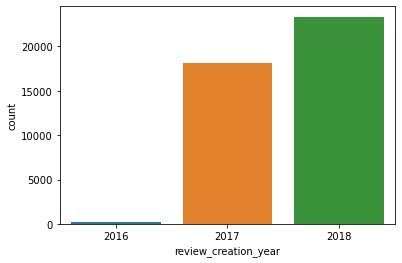

In [39]:
sns.countplot(x='review_creation_year',data=review_data) 

Most of the reviews are created in 2018

In [40]:
review_data['review_creation_month']=review_data['review_creation_date'].dt.month
review_data['review_creation_month']

0         4
1         3
2         5
3         2
4         5
         ..
41748     2
41749     5
41750     3
41751    12
41752     7
Name: review_creation_month, Length: 41753, dtype: int64

<AxesSubplot:xlabel='review_creation_month', ylabel='count'>

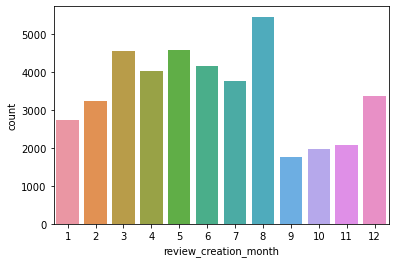

In [41]:
sns.countplot(x='review_creation_month',data=review_data) 

In [42]:
review_data['review_creation_day']=review_data['review_creation_date'].dt.day_name()
review_data['review_creation_day']

0           Friday
1         Thursday
2          Tuesday
3           Friday
4        Wednesday
           ...    
41748    Wednesday
41749     Saturday
41750     Thursday
41751       Friday
41752       Monday
Name: review_creation_day, Length: 41753, dtype: object

<AxesSubplot:xlabel='review_creation_day', ylabel='count'>

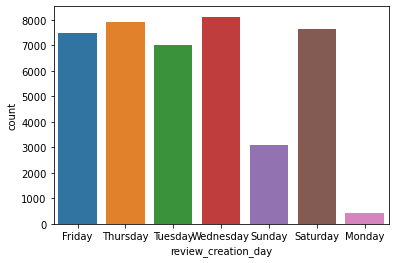

In [43]:
sns.countplot(x='review_creation_day',data=review_data) 

from the above graph we can say less people visited the site on monday.

In [44]:
df_cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Merging

In [45]:
merged_df = df_orders.copy()
merged_df=merged_df.merge(df_cust,on='customer_id', indicator=True)
merged_df=merged_df.merge(review_data,on='order_id')
merged_df=merged_df.merge(df_items,on='order_id')
merged_df=merged_df.merge(df_products, on='product_id')
merged_df=merged_df.merge(df_sellers,on='seller_id')


In [46]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', '_merge', 'review_id', 'review_score',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_creation_year',
       'review_creation_month', 'review_creation_day', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

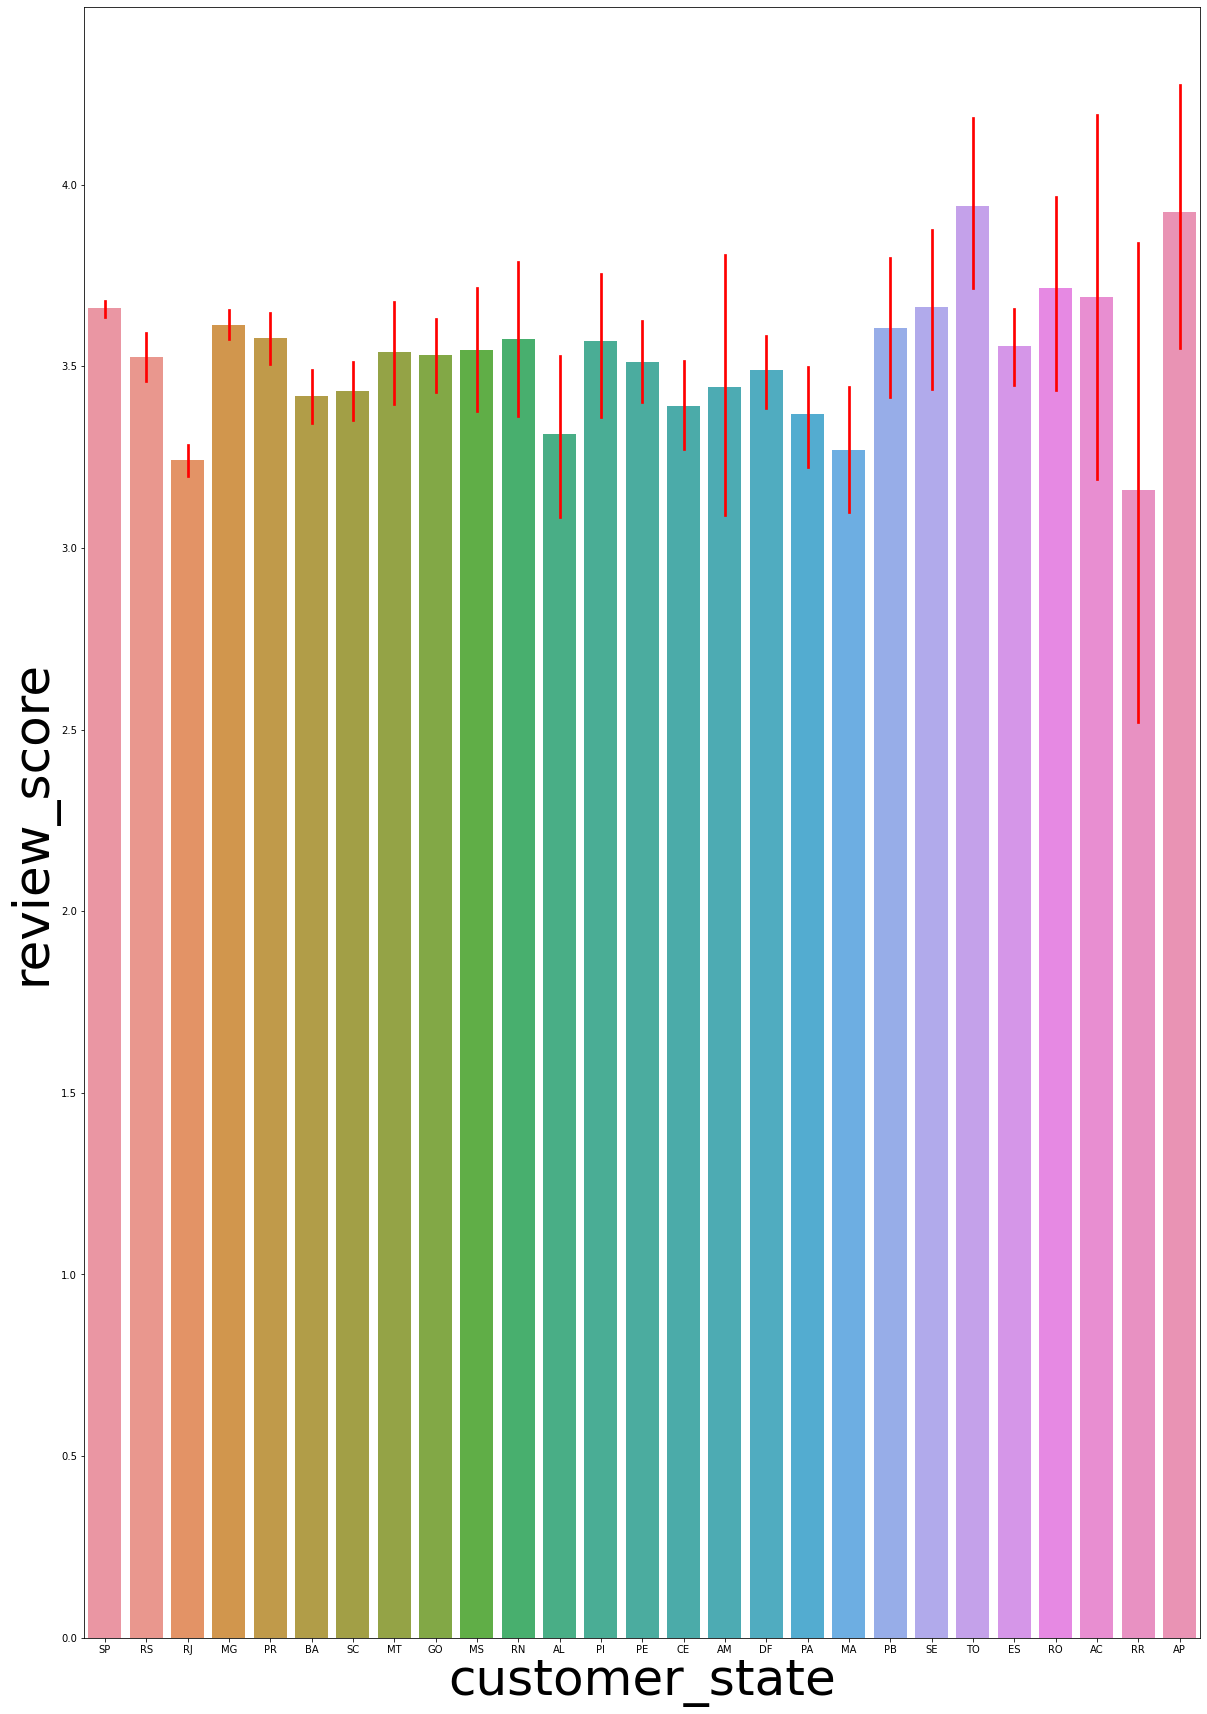

In [47]:
plt.figure(figsize=(20,30))
sns.barplot(x='customer_state',y='review_score',data=merged_df,errcolor='red')
plt.xlabel('customer_state',fontsize=50)
plt.ylabel('review_score',fontsize=50)

plt.show()

### Connect Python and MySQL

In [48]:
!pip install mysql-connector-python

In [49]:
import mysql.connector
from mysql.connector import Error

try:
    connection=mysql.connector.connect(host='localhost',database='ecommerce',user='root',password='ishita')
    
    if connection.is_connected():
        db_Info=connection.get_server_info()
        print("Connected to Mysql",db_Info)
        cursor=connection.cursor()
        cursor.execute('select database();')
        record=cursor.fetchone()
        print("you're connected to database: ",record)
        
except Error as e:
    print("Error while connecting to MySQL",e)
finally:
    if (connection.is_connected()):
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to Mysql 8.0.23
you're connected to database:  ('ecommerce',)
MySQL connection is closed


In [51]:
import mysql.connector
from mysql.connector import Error
import csv

connection=mysql.connector.connect(host='localhost',database='ecommerce',user='root',password='ishita')
cursor=connection.cursor()    
mysql_Create_Table_Query="""CREATE TABLE review(
                                review_id VARCHAR(255),
                                order_id VARCHAR(255),
                                review_score VARCHAR(255) ,
                                review_comment_message VARCHAR(255),
                                review_creation_date VARCHAR(255),
                                review_answer_timestamp VARCHAR(255),
                                review_creation_year VARCHAR(255),
                                review_creation_month VARCHAR(255),
                                review_creation_day VARCHAR(255));"""
# Execute a command: this creates a new table
cursor.execute(mysql_Create_Table_Query)
connection.commit()
print("Table created successfully in MySQL ")   

Table created successfully in MySQL 


In [ ]:
for i,row in review_data.iterrows():
    sql="INSERT INTO ecommerce.review VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql,tuple(row))
connection.commit()
print('record inserted')

In [ ]:
review_data.isnull().sum()